# Nov-20[Day-7]: Exploratory Data Analysis

In [2]:
#Environmment Setup
!pip install yfinance pandas_ta --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 16.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [3]:
#Importing Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#List of Stocks
stocks = ["RELIANCE.NS","TCS.NS","INFY.NS","HDFCBANK.NS","ICICIBANK.NS","ITC.NS","SBIN.NS","HINDUNILVR.NS","BHARTIARTL.NS","LT.NS"]



In [5]:
#Downloading Technical data
for stock in stocks:
    data = yf.download(stock, start="2015-01-01", end="2024-01-01")
    file_name = f"{stock}_technical.csv"

    data.to_csv(file_name)


#Downloading Fundamental Data
stocks = ["RELIANCE.NS","TCS.NS","INFY.NS","HDFCBANK.NS","ICICIBANK.NS","ITC.NS","SBIN.NS","HINDUNILVR.NS","BHARTIARTL.NS","LT.NS"]
fundamental_data = []

for stock in stocks:
    ticker = yf.Ticker(stock)
    info = ticker.info

    fundamentals = {
        "Stock": stock,
        "PE": info.get("trailingPE"),
        "PB": info.get("priceToBook"),
        "ROE": info.get("returnOnEquity"),
        "Profit_Margin": info.get("profitMargins"),
        "Debt_Equity": info.get("debtToEquity"),
        "PEG": info.get("pegRatio"),
        "MarketCap": info.get("marketCap"),
        "Current_Ratio": info.get("currentRatio"),
        "Quick_Ratio": info.get("quickRatio")
    }

    fundamental_data.append(fundamentals)

fund_df = pd.DataFrame(fundamental_data)

fund_df.to_csv("fundamental_data.csv", index=False)
fund_df


/tmp/ipython-input-3977057574.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3977057574.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3977057574.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3977057574.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp

,Stock,PE,PB,ROE,Profit_Margin,Debt_Equity,PEG,MarketCap,Current_Ratio,Quick_Ratio
0,RELIANCE.NS,25.485760,2.416374,0.09717,0.08314,35.651,None,21193985884160,1.100,0.578
1,TCS.NS,22.958675,10.653511,0.47356,0.19186,10.173,None,11336914305024,2.433,2.209
2,INFY.NS,22.178106,557.178500,0.29026,0.16585,8.437,None,6483613319168,2.280,2.044
3,HDFCBANK.NS,22.915619,2.830159,0.10843,0.26963,NaN,None,15414774988800,NaN,NaN
4,ICICIBANK.NS,18.815647,2.959864,0.17599,0.27915,NaN,None,9937267720192,NaN,NaN
5,ITC.NS,25.061998,7.128749,0.27811,0.44598,0.507,None,5064753152000,3.043,1.613
6,SBIN.NS,10.827862,1.577748,0.15676,0.22619,NaN,None,8982313828352,NaN,NaN
7,HINDUNILVR.NS,53.148590,11.883809,0.21819,0.16950,3.611,None,5790682316800,1.091,0.689
8,BHARTIARTL.NS,32.494170,10.280264,0.33018,0.19805,129.719,None,12728528797696,0.413,0.183
9,LT.NS,34.159680,5.526812,0.16521,0.05952,111.847,None,5603016048640,1.253,0.587


In [6]:
#Converting CSV files into Data Frames

#Technical Data Frames
technical_dfs = {}

for stock in stocks:
    file_name = f"{stock}_technical.csv"
    df = pd.read_csv(file_name)
    technical_dfs[stock] = df

#Fundamental Data Frames
fund_df = pd.read_csv("fundamental_data.csv")
fund_df



,Stock,PE,PB,ROE,Profit_Margin,Debt_Equity,PEG,MarketCap,Current_Ratio,Quick_Ratio
0,RELIANCE.NS,25.485760,2.416374,0.09717,0.08314,35.651,NaN,21193985884160,1.100,0.578
1,TCS.NS,22.958675,10.653511,0.47356,0.19186,10.173,NaN,11336914305024,2.433,2.209
2,INFY.NS,22.178106,557.178500,0.29026,0.16585,8.437,NaN,6483613319168,2.280,2.044
3,HDFCBANK.NS,22.915619,2.830159,0.10843,0.26963,NaN,NaN,15414774988800,NaN,NaN
4,ICICIBANK.NS,18.815647,2.959864,0.17599,0.27915,NaN,NaN,9937267720192,NaN,NaN
5,ITC.NS,25.061998,7.128749,0.27811,0.44598,0.507,NaN,5064753152000,3.043,1.613
6,SBIN.NS,10.827862,1.577748,0.15676,0.22619,NaN,NaN,8982313828352,NaN,NaN
7,HINDUNILVR.NS,53.148590,11.883809,0.21819,0.16950,3.611,NaN,5790682316800,1.091,0.689
8,BHARTIARTL.NS,32.494170,10.280264,0.33018,0.19805,129.719,NaN,12728528797696,0.413,0.183
9,LT.NS,34.159680,5.526812,0.16521,0.05952,111.847,NaN,5603016048640,1.253,0.587


In [7]:
#Data Inspection
#Data Inspection for Fundamental Data

''' Method:1 head(): It is used  access the first 5 rows'''
fund_df.head()

'''Method:2 tail(): It is used  access the last 5 rows'''
fund_df.tail()

'''Method:3 info(): It is used to get a summary of the dataframe'''
fund_df.info()

'''Method:4 describe(): It is used to get the statistical summary of the dataframe'''
fund_df.describe()

'''Method:5 columns(): It is used to get the column names of the dataframe'''
fund_df.columns

'''Method:6 shape(): It is used to get the shape of the dataframe'''
fund_df.shape

'''Method:7 isnull(): It is used to check for missing values in the dataframe'''
fund_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stock          10 non-null     object 
 1   PE             10 non-null     float64
 2   PB             10 non-null     float64
 3   ROE            10 non-null     float64
 4   Profit_Margin  10 non-null     float64
 5   Debt_Equity    7 non-null      float64
 6   PEG            0 non-null      float64
 7   MarketCap      10 non-null     int64  
 8   Current_Ratio  7 non-null      float64
 9   Quick_Ratio    7 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 932.0+ bytes


,0
Stock,0
PE,0
PB,0
ROE,0
Profit_Margin,0
Debt_Equity,3
PEG,10
MarketCap,0
Current_Ratio,3
Quick_Ratio,3


In [8]:
# Data Inspection
# Data Inspection for technical data

for stock in stocks:

    df = pd.read_csv(f"{stock}_technical.csv")

    ''' Method:1 head(): It is used to access the first 5 rows'''
    df.head()

    '''Method:2 tail(): It is used to access the last 5 rows'''
    df.tail()

    '''Method:3 info(): It is used to get a summary of the dataframe'''
    df.info()

    '''Method:4 describe(): It is used to get the statistical summary of the dataframe'''
    df.describe()

    '''Method:5 columns(): It is used to get the column names of the dataframe'''
    df.columns

    '''Method:6 shape(): It is used to get the shape of the dataframe'''
    df.shape

    '''Method:7 isnull(): It is used to check for missing values in the dataframe'''
    df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2223 non-null   object
 1   Close   2222 non-null   object
 2   High    2222 non-null   object
 3   Low     2222 non-null   object
 4   Open    2222 non-null   object
 5   Volume  2222 non-null   object
dtypes: object(6)
memory usage: 104.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2223 non-null   object
 1   Close   2222 non-null   object
 2   High    2222 non-null   object
 3   Low     2222 non-null   object
 4   Open    2222 non-null   object
 5   Volume  2222 non-null   object
dtypes: object(6)
memory usage: 104.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 6 columns):
 #   Column  Non-Null 

In [9]:
#Data cleaning of technical data
cleaned_dfs = {}

for stock in stocks:

    # Load CSV and skip first row
    df = pd.read_csv(f"{stock}_technical.csv", skiprows=1, header=None)

    df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

    # Convert Date to datetime
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

    # Drop invalid date rows
    df.dropna(subset=["Date"], inplace=True)

    # Set Date as index
    df.set_index("Date", inplace=True)

    # Sort rows by date
    df.sort_index(inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Remove missing values
    df.dropna(inplace=True)

    # Save cleaned file
    cleaned_name = f"{stock}_cleaned.csv"
    df.to_csv(cleaned_name)

    cleaned_dfs[stock] = df

    print(f"cleaned file: {cleaned_name}")


cleaned file: RELIANCE.NS_cleaned.csv
cleaned file: TCS.NS_cleaned.csv


/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure par

cleaned file: INFY.NS_cleaned.csv
cleaned file: HDFCBANK.NS_cleaned.csv
cleaned file: ICICIBANK.NS_cleaned.csv
cleaned file: ITC.NS_cleaned.csv


/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure par

cleaned file: SBIN.NS_cleaned.csv
cleaned file: HINDUNILVR.NS_cleaned.csv
cleaned file: BHARTIARTL.NS_cleaned.csv


/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
/tmp/ipython-input-3923576421.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


cleaned file: LT.NS_cleaned.csv


In [10]:
#Data Cleaning Of fundamental data

# Loading CSV
fund_df = pd.read_csv("fundamental_data.csv")

print("Before Cleaning:")
display(fund_df)

#Remove duplicates
fund_df.drop_duplicates(inplace=True)

#Convert all numeric columns safely
numeric_cols = ["PE", "PB", "ROE", "Profit_Margin",
                "Debt_Equity", "PEG", "MarketCap",
                "Current_Ratio", "Quick_Ratio"]

for col in numeric_cols:
    fund_df[col] = pd.to_numeric(fund_df[col], errors='coerce')

#Filling  missing numeric values using median
for col in numeric_cols:
    if fund_df[col].isnull().sum() > 0:
        median_value = fund_df[col].median()
        fund_df[col].fillna(median_value, inplace=True)

#Drop rows where EVERY numeric field is NaN
fund_df.dropna(subset=numeric_cols, how="all", inplace=True)

#Reset index
fund_df.reset_index(drop=True, inplace=True)
fund_df.drop(columns=["PEG"], inplace=True)


print("AFTER CLEANING:")
display(fund_df)

# Save cleaned fundamental data
fund_df.to_csv("fundamental_data_cleaned.csv", index=False)



Before Cleaning:


,Stock,PE,PB,ROE,Profit_Margin,Debt_Equity,PEG,MarketCap,Current_Ratio,Quick_Ratio
0,RELIANCE.NS,25.485760,2.416374,0.09717,0.08314,35.651,NaN,21193985884160,1.100,0.578
1,TCS.NS,22.958675,10.653511,0.47356,0.19186,10.173,NaN,11336914305024,2.433,2.209
2,INFY.NS,22.178106,557.178500,0.29026,0.16585,8.437,NaN,6483613319168,2.280,2.044
3,HDFCBANK.NS,22.915619,2.830159,0.10843,0.26963,NaN,NaN,15414774988800,NaN,NaN
4,ICICIBANK.NS,18.815647,2.959864,0.17599,0.27915,NaN,NaN,9937267720192,NaN,NaN
5,ITC.NS,25.061998,7.128749,0.27811,0.44598,0.507,NaN,5064753152000,3.043,1.613
6,SBIN.NS,10.827862,1.577748,0.15676,0.22619,NaN,NaN,8982313828352,NaN,NaN
7,HINDUNILVR.NS,53.148590,11.883809,0.21819,0.16950,3.611,NaN,5790682316800,1.091,0.689
8,BHARTIARTL.NS,32.494170,10.280264,0.33018,0.19805,129.719,NaN,12728528797696,0.413,0.183
9,LT.NS,34.159680,5.526812,0.16521,0.05952,111.847,NaN,5603016048640,1.253,0.587


AFTER CLEANING:


/tmp/ipython-input-180624701.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fund_df[col].fillna(median_value, inplace=True)


,Stock,PE,PB,ROE,Profit_Margin,Debt_Equity,MarketCap,Current_Ratio,Quick_Ratio
0,RELIANCE.NS,25.485760,2.416374,0.09717,0.08314,35.651,21193985884160,1.100,0.578
1,TCS.NS,22.958675,10.653511,0.47356,0.19186,10.173,11336914305024,2.433,2.209
2,INFY.NS,22.178106,557.178500,0.29026,0.16585,8.437,6483613319168,2.280,2.044
3,HDFCBANK.NS,22.915619,2.830159,0.10843,0.26963,10.173,15414774988800,1.253,0.689
4,ICICIBANK.NS,18.815647,2.959864,0.17599,0.27915,10.173,9937267720192,1.253,0.689
5,ITC.NS,25.061998,7.128749,0.27811,0.44598,0.507,5064753152000,3.043,1.613
6,SBIN.NS,10.827862,1.577748,0.15676,0.22619,10.173,8982313828352,1.253,0.689
7,HINDUNILVR.NS,53.148590,11.883809,0.21819,0.16950,3.611,5790682316800,1.091,0.689
8,BHARTIARTL.NS,32.494170,10.280264,0.33018,0.19805,129.719,12728528797696,0.413,0.183
9,LT.NS,34.159680,5.526812,0.16521,0.05952,111.847,5603016048640,1.253,0.587


In [11]:
#Merging Both technical and fundamental data
# Load cleaned fundamental data
fund_df = pd.read_csv("fundamental_data_cleaned.csv")

merged_dfs = {}

for stock in stocks:

    print(f"Merging data for: {stock}")

    #Load cleaned technical data
    tech_df = pd.read_csv(f"{stock}_cleaned.csv")

    # Add Stock column to technical dataframe
    tech_df["Stock"] = stock

    # Extract the matching fundamental row
    fund_row = fund_df[fund_df["Stock"] == stock]

    #Merge technical + fundamental data
    merged_df = tech_df.merge(fund_row, on="Stock", how="left")

    #Save merged dataset
    file_name = f"{stock}_merged.csv"
    merged_df.to_csv(file_name, index=False)

    merged_dfs[stock] = merged_df



Merging data for: RELIANCE.NS
Merging data for: TCS.NS
Merging data for: INFY.NS
Merging data for: HDFCBANK.NS
Merging data for: ICICIBANK.NS
Merging data for: ITC.NS
Merging data for: SBIN.NS
Merging data for: HINDUNILVR.NS
Merging data for: BHARTIARTL.NS
Merging data for: LT.NS


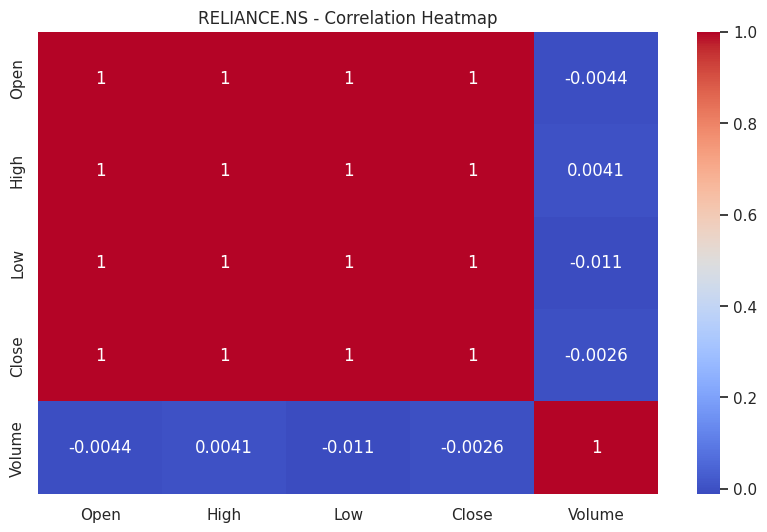

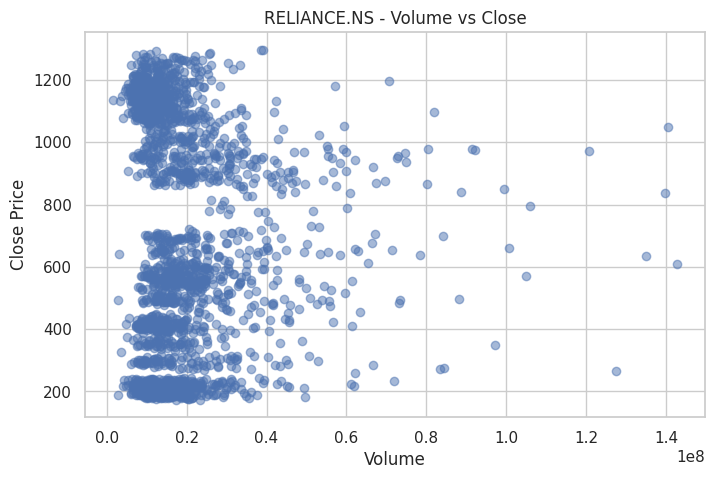

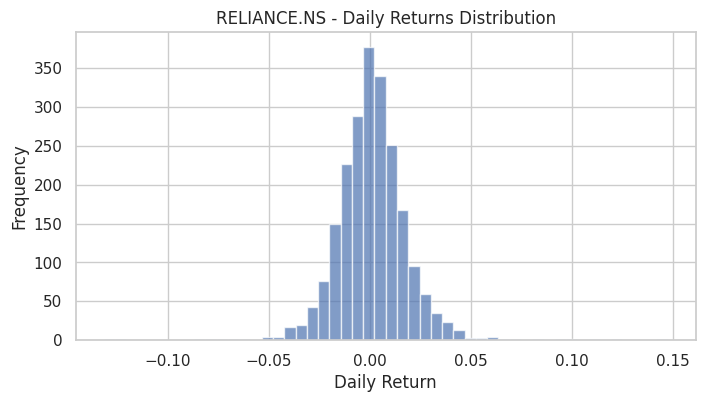

In [17]:
#Exploratory Data Analysis
sns.set(style="whitegrid")

stock = "RELIANCE.NS"
df.head()
#Method:1 Correlation HeatMap
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(),
            annot=True, cmap='coolwarm')
plt.title(f"{stock} - Correlation Heatmap")
plt.show()

#Method:2 Scatter Plots[volume vs close]
plt.figure(figsize=(8,5))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title(f"{stock} - Volume vs Close")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

#Method:3 Daily Returns Distribution (Volatility)
df['Returns'] = df['Close'].pct_change()

plt.figure(figsize=(8,4))
plt.hist(df['Returns'].dropna(), bins=50, alpha=0.7)
plt.title(f"{stock} - Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



